## `Import Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import sqlite3

sns.set(rc={'figure.figsize': [17, 17]}, font_scale=1.2)

## `Load Data`

In [2]:
df1= pd.read_csv('Clothes.csv')
print(df1.shape)

with pd.option_context('display.max_colwidth', None):
    display(df1.head())

(3050, 6)


,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Features
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,"['material: 100% linen', 'care instructions: hand wash', 'side slit pockets', 'Made in the USA']"
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"['material: 66% cotton, 31% viscose, 3% elastane', 'care instructions: hand wash', 'side slit pockets, faux pockets', 'zipper fly, button fastening']"
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,"['care instructions: machine wash cold', 'five pockets', 'zipper fly, button fastening', 'Made in Turkey']"
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"['material: 70% virgin wool, 30% cashmere', 'care instructions: hand wash', 'Made in China', 'Designer colour name: 225-41']"
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"['material: 100% viscose', 'material II: 65% viscose, 35% cupro', 'material III: 100% silk', 'care instructions: dry clean']"


## `Exploratory Data Analysis - EDA` & `Feature Engineering`

In [3]:
import ast

output= df1['Product Features'].map(lambda x: ast.literal_eval(x))
data= pd.DataFrame(output)
data

,Product Features
0,"[material: 100% linen, care instructions: hand..."
1,"[material: 66% cotton, 31% viscose, 3% elastan..."
2,"[care instructions: machine wash cold, five po..."
3,"[material: 70% virgin wool, 30% cashmere, care..."
4,"[material: 100% viscose, material II: 65% visc..."
...,...
3045,"[material: 100% cotton, filling: 100% polyeste..."
3046,"[material: 82% triacetate, 18% polyester, care..."
3047,"[material: 100% wool, care instructions: dry c..."
3048,"[material: 99% organic cotton, 1% elastane, ca..."


In [4]:
all_data= pd.concat([df1.iloc[:, :-1], data], axis= 1)
all_data
all_data.drop('Product Features', axis= 1, inplace= True)
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN
...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,NaN
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,NaN
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,NaN
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600


In [5]:
import numpy as np
l= ['material', 'lining', 'care instructions', 'Made in', 'Designer colour name']

Material= []
Lining= []
Care_Instructions= []
Manufacturing_Country= []
Colour= []

for i in l:
    for j in range(len(data)):
        if i == 'material':
            material_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Material.append(material_filter)
            
        elif i == 'lining':
            lining_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Lining.append(lining_filter)
        
        elif i == 'care instructions':
            care_instructions_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Care_Instructions.append(care_instructions_filter)
        
        elif i == 'Made in':
            manufacturing_country_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Manufacturing_Country.append(manufacturing_country_filter)
        
        elif i == 'Designer colour name':
            colour_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Colour.append(colour_filter)
        
print(len(Material), '\n')
print(len(Lining), '\n')
print(len(Care_Instructions), '\n')
print(len(Manufacturing_Country), '\n')
print(len(Colour), '\n')

3050 

3050 

3050 

3050 

3050 



In [6]:
Material_lst= []
Lining_lst= []
Care_Instructions_lst= []
Manufacturing_Country_lst= []
Colour_lst= []

for i in Material:
    if len(i)>0:
        Material_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Material_lst.append(np.nan)

for i in Lining:
    if len(i)>0:
        Lining_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Lining_lst.append(np.nan)
    
for i in Care_Instructions:
    if len(i)>0:
        Care_Instructions_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Care_Instructions_lst.append(np.nan)

for i in Manufacturing_Country:
    if len(i)>0:
        Manufacturing_Country_lst.append(', '.join(i).split(' ')[-1].strip())
    else:
        Manufacturing_Country_lst.append(np.nan)
        
for i in Colour:
    if len(i)>0:
        Colour_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Colour_lst.append(np.nan)

In [7]:
data['Product Material']= Material_lst
data['Product Lining']= Lining_lst
data['Product Care Instructions']= Care_Instructions_lst
data['Product Manufacturing Country']= Manufacturing_Country_lst
data['Product Colour']= Colour_lst

In [8]:
all_data= pd.concat([df1.iloc[:, :-1], data], axis= 1)
all_data
all_data.drop('Product Features', axis= 1, inplace= True)
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,NaN,hand wash,USA,NaN
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",NaN,hand wash,NaN,NaN
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,NaN,NaN,machine wash cold,Turkey,NaN
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"70% virgin wool, 30% cashmere",NaN,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"100% viscose, material II",NaN,dry clean,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,NaN,100% cotton,"100% cashmere, fully lined",NaN,NaN,NaN
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,NaN,"82% triacetate, 18% polyester",NaN,dry clean,China,NaN
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,NaN,100% wool,NaN,dry clean,China,NaN
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",NaN,machine wash at 30 degrees,NaN,NaN


## `Data Analysis`

In [9]:
all_data.isnull().sum() * 100 / 3050

Product Designer                  0.721311
Product Name                      0.524590
Product Price                     0.524590
Product No                        0.524590
Product Discount                 51.803279
Product Material                  4.524590
Product Lining                   69.967213
Product Care Instructions        11.606557
Product Manufacturing Country    50.622951
Product Colour                   81.540984
dtype: float64

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Product Designer               3028 non-null   object
 1   Product Name                   3034 non-null   object
 2   Product Price                  3034 non-null   object
 3   Product No                     3034 non-null   object
 4   Product Discount               1470 non-null   object
 5   Product Material               2912 non-null   object
 6   Product Lining                 916 non-null    object
 7   Product Care Instructions      2696 non-null   object
 8   Product Manufacturing Country  1506 non-null   object
 9   Product Colour                 563 non-null    object
dtypes: object(10)
memory usage: 238.4+ KB


In [11]:
def fixed_price1(z):
    try:
        return float(z.split(' ')[1])
    except:
         return np.nan
all_data['Product Price']=all_data['Product Price'].apply(fixed_price1)   

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product Designer               3028 non-null   object 
 1   Product Name                   3034 non-null   object 
 2   Product Price                  2375 non-null   float64
 3   Product No                     3034 non-null   object 
 4   Product Discount               1470 non-null   object 
 5   Product Material               2912 non-null   object 
 6   Product Lining                 916 non-null    object 
 7   Product Care Instructions      2696 non-null   object 
 8   Product Manufacturing Country  1506 non-null   object 
 9   Product Colour                 563 non-null    object 
dtypes: float64(1), object(9)
memory usage: 238.4+ KB


In [13]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Designer']=impute.fit_transform(all_data[['Product Designer']])
impute.statistics_

array(['VINCE'], dtype=object)

In [14]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Name']=impute.fit_transform(all_data[['Product Name']])
impute.statistics_

array(['Cashmere sweater'], dtype=object)

In [15]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product No']=impute.fit_transform(all_data[['Product No']])
impute.statistics_

array(['P00668921'], dtype=object)

In [16]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Discount']=impute.fit_transform(all_data[['Product Discount']])
impute.statistics_

array(['10% off over €600'], dtype=object)

In [17]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Material']=impute.fit_transform(all_data[['Product Material']])
impute.statistics_

array(['100% cotton'], dtype=object)

In [18]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Lining']=impute.fit_transform(all_data[['Product Lining']])
impute.statistics_

array(['100% polyester, fully lined'], dtype=object)

In [19]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Care Instructions']=impute.fit_transform(all_data[['Product Care Instructions']])
impute.statistics_

array(['dry clean'], dtype=object)

In [20]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Manufacturing Country']=impute.fit_transform(all_data[['Product Manufacturing Country']])
impute.statistics_

array(['China'], dtype=object)

In [21]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
all_data['Product Colour']=impute.fit_transform(all_data[['Product Colour']])
impute.statistics_

array(['Black'], dtype=object)

In [22]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
all_data['Product Price']=impute.fit_transform(all_data[['Product Price']])
impute.statistics_

array([329.])

In [23]:
all_data.isnull().sum() * 100 / 3050

Product Designer                 0.0
Product Name                     0.0
Product Price                    0.0
Product No                       0.0
Product Discount                 0.0
Product Material                 0.0
Product Lining                   0.0
Product Care Instructions        0.0
Product Manufacturing Country    0.0
Product Colour                   0.0
dtype: float64

In [24]:
all_data.describe()

,Product Price
count,3050.000000
mean,378.880328
std,202.793715
min,49.000000
25%,245.000000
50%,329.000000
75%,455.000000
max,995.000000


In [25]:
all_data['Product Designer'].unique()

array(['VINCE', 'FRAME', 'JARDIN DES ORANGERS', 'SAINT LAURENT',
       'GIVENCHY', 'TOM FORD', 'POLO RALPH LAUREN', 'ETRO',
       'LOVESHACKFANCY', 'TOTÊME', 'NENSI DOJAKA', 'AGUA BY AGUA BENDITA',
       'ALEXANDER MCQUEEN', 'LOEWE', 'ALEXANDRE VAUTHIER', 'DION LEE',
       'THE ATTICO', 'KARLA COLLETTO', 'RASARIO', 'ALÉMAIS', 'MONCLER',
       'BALENCIAGA', 'PACO RABANNE', 'NORMA KAMALI', 'REDVALENTINO',
       'SAFIYAA', 'ROKSANDA', 'OSCAR DE LA RENTA', 'ISABEL MARANT',
       'VICTORIA BECKHAM', 'BARRIE', 'THOM BROWNE', '7 FOR ALL MANKIND',
       'VELVET', 'JONATHAN SIMKHAI', 'ERDEM', 'SEE BY CHLOÉ',
       'REINA OLGA', 'ERES', 'CAMILLA', 'JOHANNA ORTIZ', 'CANADA GOOSE',
       'REBECCA VALLANCE', 'ANNA KOSTUROVA', 'OSÉREE', 'LEMAIRE',
       'OFF-WHITE', 'STELLA MCCARTNEY', 'BOGNER', 'MISSONI MARE',
       'YVES SALOMON', 'ALANUI', 'HUNZA G', 'TORY SPORT', 'VERSACE',
       'ISABEL MARANT, ÉTOILE', 'MAISON MARGIELA', 'GIAMBATTISTA VALLI',
       'JEAN PAUL GAULTIER', 'MELISSA 

In [26]:
all_data['Product Designer'].nunique()

167

In [27]:
all_data['Product Designer'].value_counts()

VINCE                    144
JARDIN DES ORANGERS      108
VELVET                    99
MELISSA ODABASH           95
ISABEL MARANT, ÉTOILE     84
                        ... 
MUGLER                     1
MÔNOT                      1
NOIR KEI NINOMIYA          1
AREA                       1
JUNYA WATANABE             1
Name: Product Designer, Length: 167, dtype: int64

In [28]:
all_data['Product Name'].unique() 

array(['Dora linen minidress', 'High-rise cropped cotton-blend pants',
       'Le High cropped straight jeans', ...,
       'Loran corduroy shirt jacket', 'Wilde satin crêpe midi dress',
       'Girlfriend mid-rise cropped jeans'], dtype=object)

In [29]:
all_data['Product Name'].nunique() 

2462

In [30]:
all_data['Product Name'].value_counts() 

Cashmere sweater                        34
Cashmere cardigan                       13
Wool and cashmere sweater               12
Wool and cashmere cardigan              12
High-rise straight jeans                 7
                                        ..
Ebbaz checked shirt jacket               1
White Label ribbed-knit sweater          1
Ayala lace-trimmed cotton midi dress     1
Floral cotton shirt dress                1
Single-breasted leather blazer           1
Name: Product Name, Length: 2462, dtype: int64

In [31]:
all_data['Product No'].unique()

array(['P00697841', 'P00727516', 'P00683891', ..., 'P00701605',
       'P00683515', 'P00700213'], dtype=object)

In [32]:
all_data['Product No'].nunique()

2864

In [33]:
all_data['Product No'].value_counts()

P00668921    18
P00740882     2
P00683814     2
P00742641     2
P00722119     2
             ..
P00710953     1
P00693368     1
P00702830     1
P00699726     1
P00716648     1
Name: Product No, Length: 2864, dtype: int64

In [34]:
all_data['Product Material'].unique()

array(['100% linen', '66% cotton, 31% viscose, 3% elastane',
       '100% cotton', '70% virgin wool, 30% cashmere',
       '100% viscose, material II', '100% lamb leather, material II',
       '97% cotton, 3% elastane', '100% ramie',
       '72% polyester, 28% elastane',
       '81% recycled polyester, 19% elastane',
       '52% polyester, 48% cotton', '100% polyester',
       '93% polyester, 7% elastane, material II',
       '100% polyamide, material II', '70% cashmere, 30% silk',
       '72% nylon, 28% elastane', '97% polyester, 3% elastane',
       '70% wool, 30% cashmere', '100% polyamide',
       '98% cotton, 2% elastane', '80% polyester, 20% elastane',
       '69% viscose, 31% polyamide', '82% viscose, 18% polyester',
       '95% polyester, 5% elastane', '79% wool, 21% polyamide',
       '92% polyester, 8% elastane', '100% virgin wool',
       '85% polyamide, 15% cotton', '100% cotton, material II',
       '66% viscose, 21% elastane, 13% polyester',
       '79% cashmere, 21% wool

In [35]:
all_data['Product Material'].nunique()

771

In [36]:
all_data['Product Material'].value_counts()

100% cotton                                                       582
100% silk                                                         138
100% viscose                                                      117
100% cashmere                                                     105
100% wool                                                         100
                                                                 ... 
93% modal, 7% elastane                                              1
84% cotton, 12% viscose, 4% polyamide                               1
54% acrylic, 46% polyester, material II                             1
92% cotton, 6% polyester, 2% elastane                               1
47% acrylic, 22% cotton, 12% alpaca wool, 11% wool, 8% viscose      1
Name: Product Material, Length: 771, dtype: int64

In [37]:
all_data['Product Lining'].unique()

array(['100% polyester, fully lined', '57% cupro, 43% polyester',
       '73% polyester, 27% elastane',
       '86% polyester, 14% elastane, fully lined',
       '92% cupro, 8% elastane, fully lined', '100% cotton',
       '98% polyester, 2% elastane, fully lined',
       '100% viscose, fully lined', '100% polyamide, fully lined',
       '100% cupro, fully lined, pocket lining',
       '64% acetate, 36% polyester', '100% polyester, partially lined',
       '53% cupro, 47% cotton, partially lined',
       '51% viscose, 49% cotton, fully lined',
       '80% polyamide, 20% elastane',
       '95% polyester, 5% elastane, fully lined',
       '72% nylon, 28% elastane, partially lined',
       '82% viscose, 18% polyamide, fully lined',
       '100% silk, fully lined', '100% polyester',
       '100% polyester, fully lined, pocket lining', 'fully lined',
       '97% polyester, 3% elastane, fully lined',
       '73% acetate, 27% silk, fully lined',
       '100% recycled polyamide, fully lined',


In [38]:
all_data['Product Lining'].nunique()

252

In [39]:
all_data['Product Lining'].value_counts()

100% polyester, fully lined                   2194
fully lined                                     52
100% cotton, partially lined                    46
100% polyamide, fully lined                     39
100% cotton                                     39
                                              ... 
100% cashmere, fully lined                       1
62% acetate, 38% polyester                       1
65% polyester, 36% cotton                        1
100% cotton, lining II                           1
82% triacetate, 18% polyester, fully lined       1
Name: Product Lining, Length: 252, dtype: int64

In [40]:
all_data['Product Lining'].value_counts()

100% polyester, fully lined                   2194
fully lined                                     52
100% cotton, partially lined                    46
100% polyamide, fully lined                     39
100% cotton                                     39
                                              ... 
100% cashmere, fully lined                       1
62% acetate, 38% polyester                       1
65% polyester, 36% cotton                        1
100% cotton, lining II                           1
82% triacetate, 18% polyester, fully lined       1
Name: Product Lining, Length: 252, dtype: int64

In [41]:
all_data['Product Care Instructions'].unique()

array(['hand wash', 'machine wash cold', 'dry clean',
       'machine wash at 30 degrees', 'specialist clean', 'do not clean',
       'spot clean', 'machine wash at 40 degrees', 'machine wash'],
      dtype=object)

In [42]:
all_data['Product Care Instructions'].nunique()

9

In [43]:
all_data['Product Care Instructions'].value_counts()

dry clean                     1449
hand wash                      812
machine wash at 30 degrees     448
machine wash cold              191
specialist clean                85
do not clean                    32
machine wash at 40 degrees      24
machine wash                     7
spot clean                       2
Name: Product Care Instructions, dtype: int64

In [44]:
all_data['Product Manufacturing Country'].unique()

array(['USA', 'China', 'Turkey', 'Portugal', 'Italy', 'India', 'Romania',
       'UK', 'France', 'Colombia', 'Philippines', 'Peru', 'Vietnam',
       'Indonesia', 'Greece', 'Moldova', 'Japan', 'Bulgaria', 'Poland',
       'Hungary', 'Australia', 'Tunisia', 'Scotland', 'Morocco',
       'Madagascar', 'Mongolia', 'Serbia', 'Korea', 'Slovakia',
       'Slovenia', 'England'], dtype=object)

In [45]:
all_data['Product Manufacturing Country'].nunique()

31

In [46]:
all_data['Product Manufacturing Country'].value_counts()

China          2048
Italy           457
Portugal         94
USA              88
India            71
Turkey           52
Indonesia        48
Romania          26
Vietnam          24
Tunisia          20
France           17
UK               17
Colombia         17
Bulgaria         12
Peru              8
Morocco           8
Poland            7
Hungary           6
Philippines       6
Moldova           4
Japan             4
Korea             3
Madagascar        2
Mongolia          2
England           2
Scotland          2
Slovenia          1
Serbia            1
Greece            1
Slovakia          1
Australia         1
Name: Product Manufacturing Country, dtype: int64

In [47]:
all_data['Product Colour'].unique()

array(['Black', '225-41', 'White', '83', 'Dk Jade', '225-60',
       'Dark Orchid', 'Rose Garden', '225-38', 'Hickory', 'Noir',
       'Mediteranee', 'Imprime Effigie', 'Olive/Ecru', '225-490', 'Flag',
       '6040', 'Carmine', '225-14', 'Orange/Black/Blue',
       'Orange/Blue/Yellow', 'Black Truffle', 'Pale Mineral', 'Moon',
       'Sand Shell', 'Green Purple', 'Navy', 'Petal', 'Blue/Black',
       'Light Hay', 'Rust Amber', '225-83', 'Balsamic', 'Lilas',
       'Olive Green', 'Brown', 'Monarca Cream', 'Camel', 'Verde',
       'Black/Green', 'Pale Lemon', 'Light Blue', 'Lt Rosa', 'Ivory',
       'Black Ivory', '225-54', 'Honey', 'Off White', 'Ecru', 'Coal',
       'Chalk', 'Ash', 'Pistachio', '225-10', 'Optic White', 'Smoke',
       'Biscuit', 'Neutral', 'Plum Wine', 'Rouge', 'Nero', 'Blue White',
       'White Sand', 'Mid Grey', '225-14/82', 'Zinnia', 'Heat', 'Merlot',
       'Noir Alaia', 'Parfait', 'Silver', 'Bluette', 'Blck-Wht', 'Night',
       'Green', 'Light Pink', 'Soft White

In [48]:
all_data['Product Colour'].nunique()

327

In [49]:
all_data['Product Colour'].value_counts()

Black                2567
White                  10
Ivory                   8
Pink                    8
Blue                    6
                     ... 
Papaya                  1
Lime                    1
Orange Poppy            1
White khaki             1
Pasta Fdo. Giallo       1
Name: Product Colour, Length: 327, dtype: int64

## `Data Visualization`

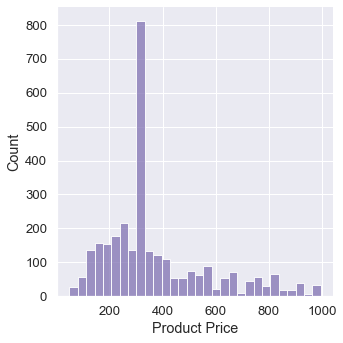

In [50]:
sns.displot(all_data['Product Price'], kde=False, bins=30, color='m')

<AxesSubplot:xlabel='Product Price', ylabel='Density'>

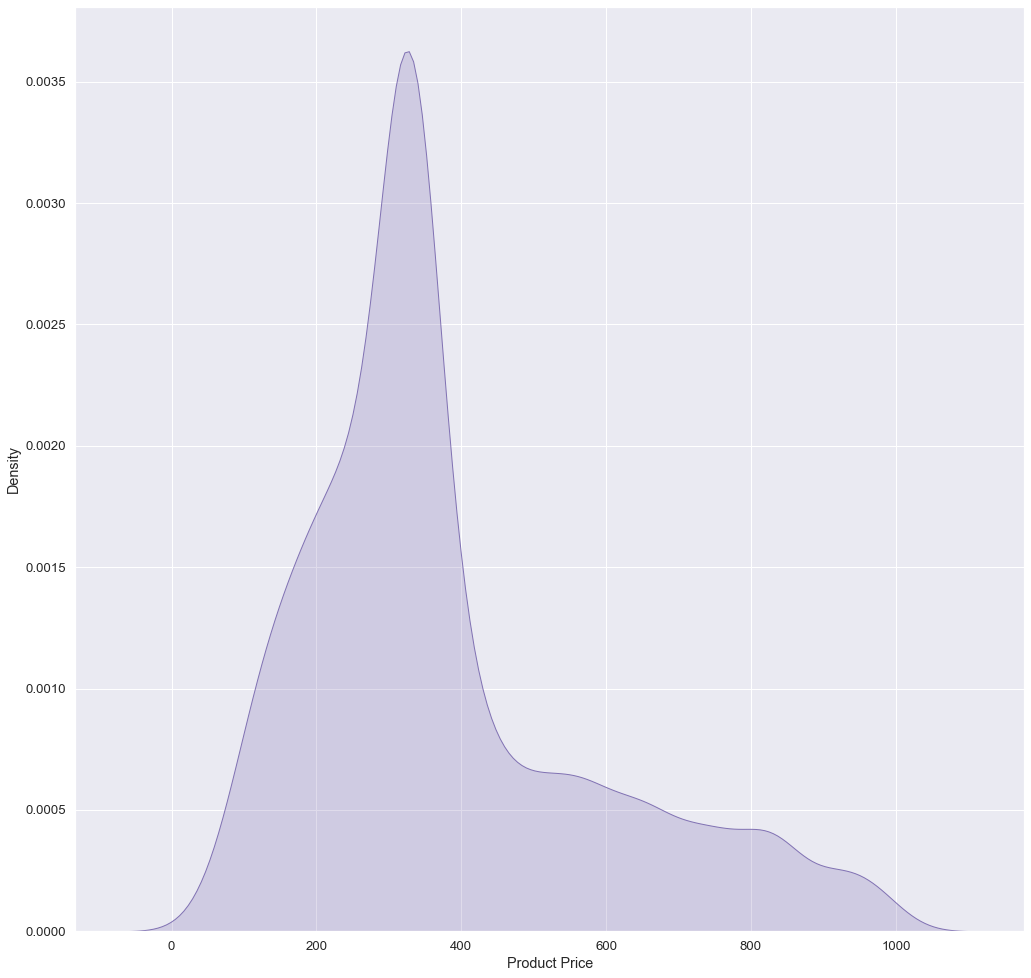

In [51]:
sns.kdeplot(all_data['Product Price'], shade=True, color='m')

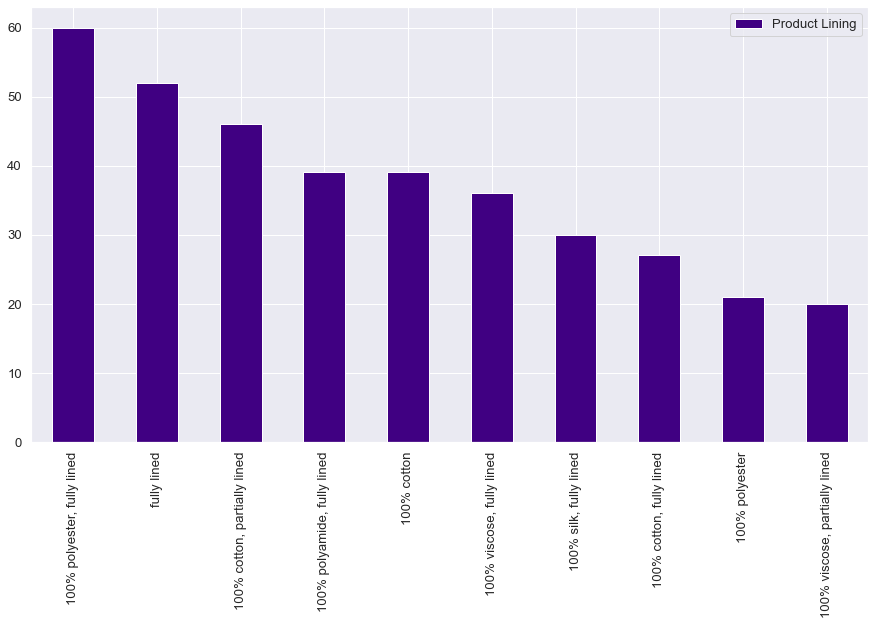

In [52]:
plt.figure(figsize = (15,8))
data['Product Lining'].value_counts().head(10).plot(kind='bar' , color = '#400082')
plt.legend()

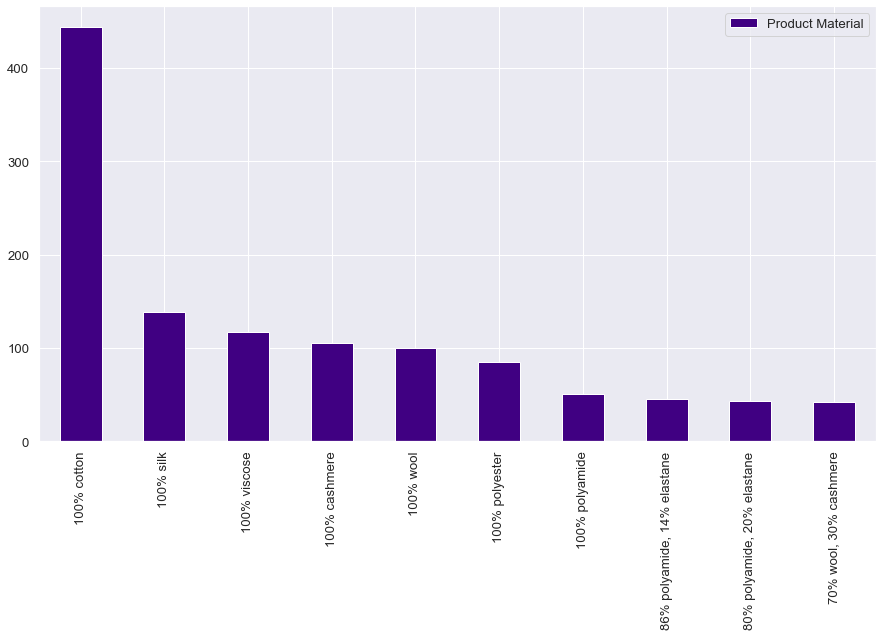

In [53]:
plt.figure(figsize = (15,8))
data['Product Material'].value_counts().head(10).plot(kind='bar' , color = '#400082')
plt.legend()

<AxesSubplot:>

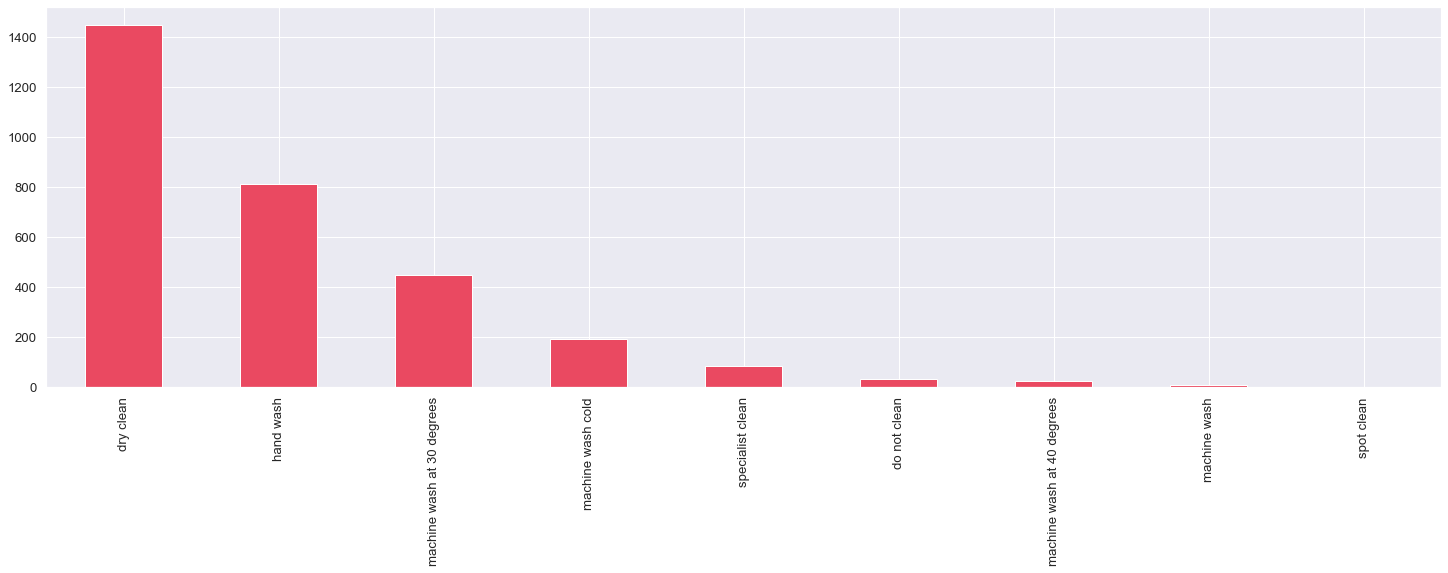

In [54]:
plt.figure(figsize=(25,7))
all_data['Product Care Instructions'].value_counts().head(10).plot(kind='bar' , color = '#EA4961')

<AxesSubplot:xlabel='Product Manufacturing Country', ylabel='count'>

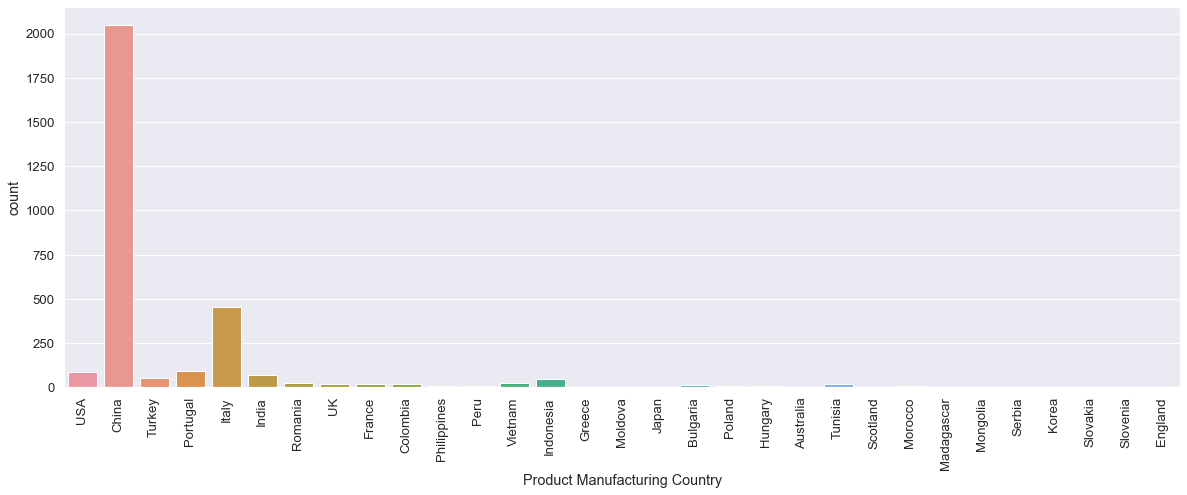

In [55]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(x=all_data['Product Manufacturing Country'])

<AxesSubplot:xlabel='count', ylabel='Product Care Instructions'>

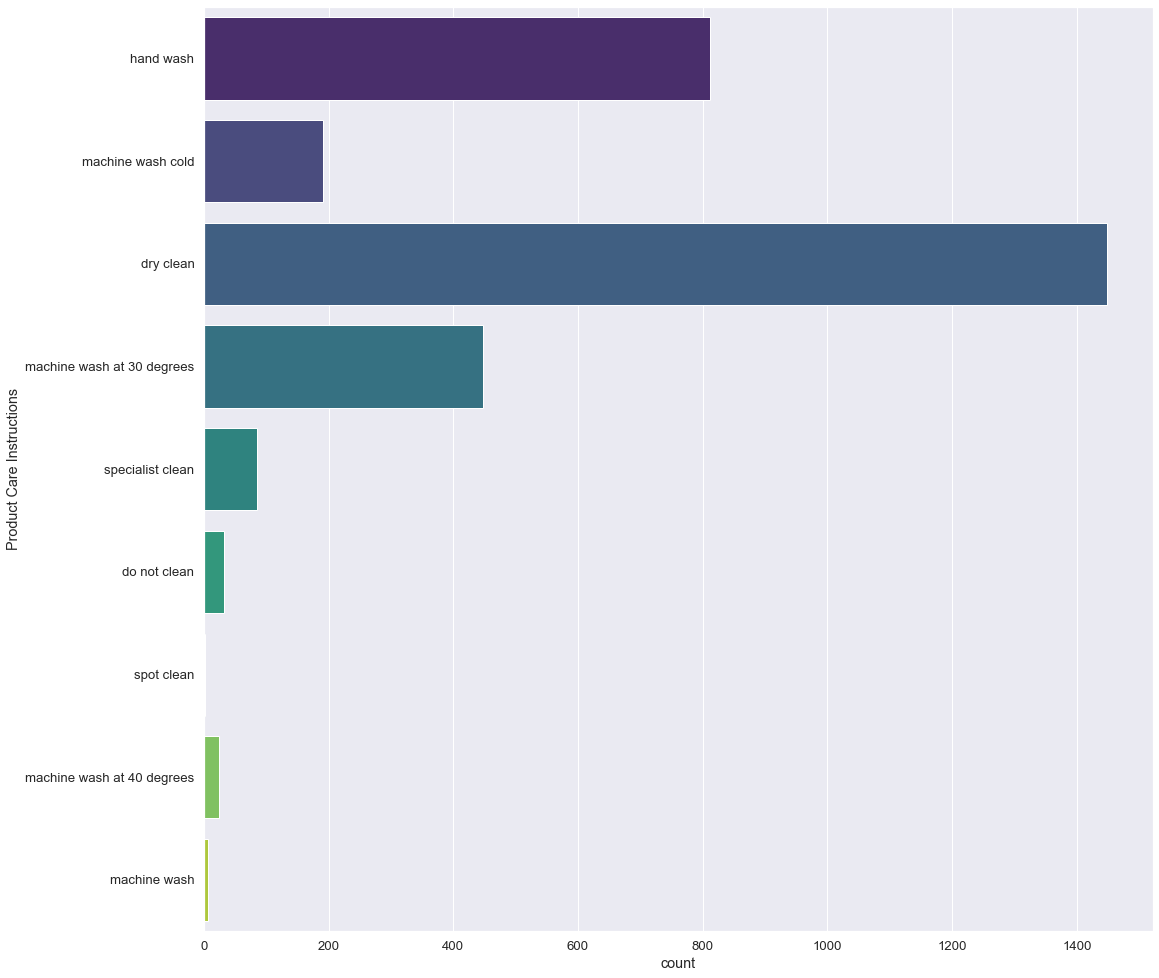

In [56]:
sns.countplot(y='Product Care Instructions', data=all_data, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Product Manufacturing Country'>

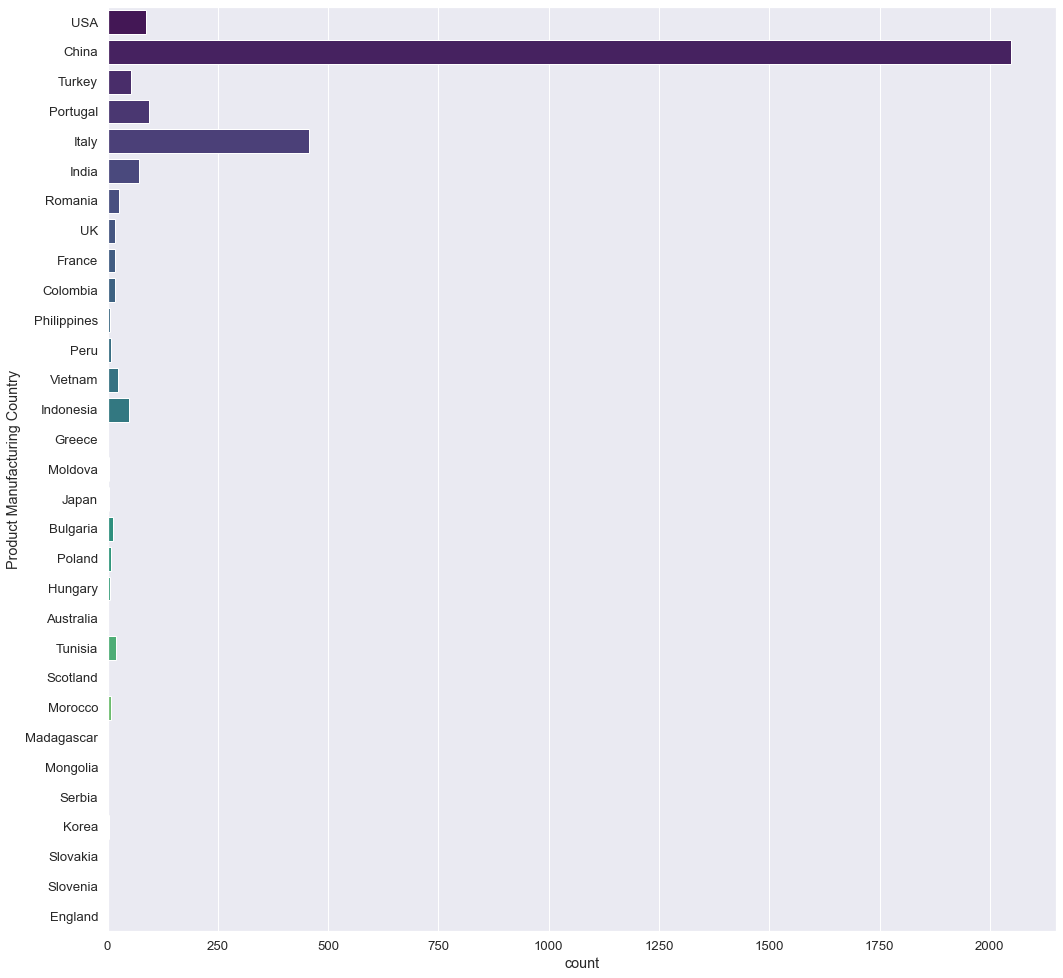

In [57]:
sns.countplot(y='Product Manufacturing Country', data=all_data, palette='viridis')

In [58]:
all_data.to_csv('Colthing_imputer.csv')

In [59]:
df=pd.read_csv('Colthing_imputer.csv')
df

,Unnamed: 0,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,0,VINCE,Dora linen minidress,235.0,P00697841,10% off over €600,100% linen,"100% polyester, fully lined",hand wash,USA,Black
1,1,VINCE,High-rise cropped cotton-blend pants,295.0,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane","100% polyester, fully lined",hand wash,China,Black
2,2,FRAME,Le High cropped straight jeans,199.0,P00683891,10% off over €600,100% cotton,"100% polyester, fully lined",machine wash cold,Turkey,Black
3,3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,339.0,P00718713,10% off over €600,"70% virgin wool, 30% cashmere","100% polyester, fully lined",hand wash,China,225-41
4,4,SAINT LAURENT,Embellished satin gown,329.0,P00728419,10% off over €600,"100% viscose, material II","100% polyester, fully lined",dry clean,China,Black
...,...,...,...,...,...,...,...,...,...,...,...
3045,3045,LORO PIANA,Loran corduroy shirt jacket,329.0,P00703567,10% off over €600,100% cotton,"100% cashmere, fully lined",dry clean,China,Black
3046,3046,ALEX PERRY,Wilde satin crêpe midi dress,329.0,P00704311,10% off over €600,"82% triacetate, 18% polyester","100% polyester, fully lined",dry clean,China,Black
3047,3047,JW ANDERSON,Logo intarsia wool hoodie,635.0,P00701605,10% off over €600,100% wool,"100% polyester, fully lined",dry clean,China,Black
3048,3048,AG JEANS,Girlfriend mid-rise cropped jeans,195.0,P00683515,10% off over €600,"99% organic cotton, 1% elastane","100% polyester, fully lined",machine wash at 30 degrees,China,Black


In [60]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

## `Database`

In [61]:
import sqlite3
connection=sqlite3.connect('Clothing_imputer.db')
c=connection.cursor()

c.execute('CREATE TABLE IF NOT EXISTS clothing(Product_Designe text, Product_Name text, Product_Price number, Product_No text,Product_Discount text,Product_Material text,Product_Lining textProduct_Care_Instructions text, Product_Manufacturing_Country text,Product_Colour text)') 

connection.commit()

In [62]:
df.to_sql('Clothing_imputer', connection, index=False, if_exists='replace')

C:\Users\ELPOP\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## `Machine learning`

In [63]:

df = pd.get_dummies(df, columns=['Product Designer','Product Name','Product No','Product Discount','Product Material','Product Lining','Product Care Instructions','Product Manufacturing Country','Product Colour']
       , drop_first=True)
df


,Product Price,Product Designer_3X1 N.Y.C.,Product Designer_7 FOR ALL MANKIND,Product Designer_A.P.C.,Product Designer_ACNE STUDIOS,Product Designer_AG JEANS,Product Designer_AGOLDE,Product Designer_AGUA BY AGUA BENDITA,Product Designer_ALANUI,Product Designer_ALAÏA,...,Product Colour_White Powder,Product Colour_White Sand,Product Colour_White khaki,Product Colour_White/Multicolor,Product Colour_Winsome Orchid,Product Colour_Wisteria,Product Colour_Yellow,Product Colour_Yellow Ditsy Floral,Product Colour_Zebra Sepia,Product Colour_Zinnia
0,235.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,295.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,199.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,339.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,329.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,329.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3046,329.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3047,635.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048,195.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
x= df.drop('Product Price', axis=1)
y = df['Product Price']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [
     LinearRegression(),
     KNeighborsRegressor(),
     DecisionTreeRegressor(),
     SVR(),
     RandomForestRegressor(), 
     XGBRegressor()
]

for model in models:  
     print(model)
     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)
     print(f'R2: {r2_score(y_test, y_pred) * 100}')
     print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
     print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n---------')